<a href="https://colab.research.google.com/github/Vaibhavi09/Diabetes-Prediction-Ensemble/blob/main/Diabetes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


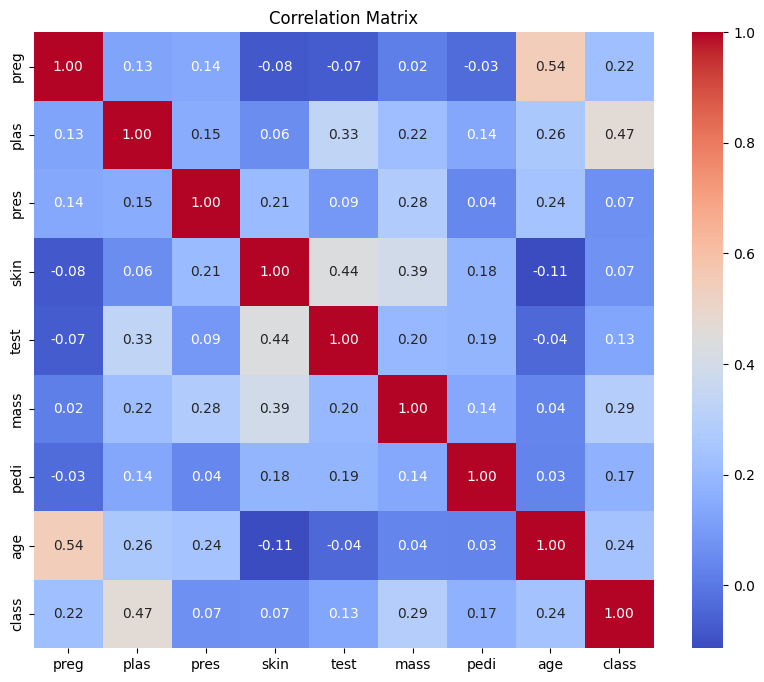

In [ ]:
# Visualize the correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X = dataset.drop('class', axis=1)
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features (perform feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a Logistic Regression model with 'saga' solver and increased max_iter
model = LogisticRegression(solver='saga', max_iter=1000)

In [ ]:
# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {accuracy:.2f}")

Final Accuracy: 0.75


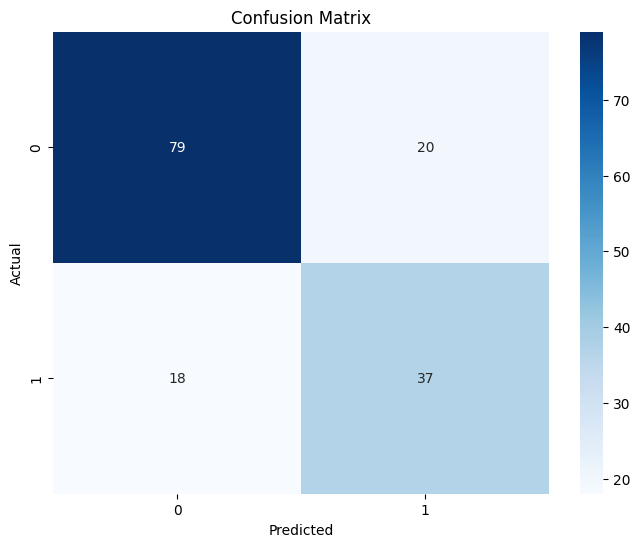

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()